# Data Dictionary and Univariate Analysis
The purpose of this notebook is to obtain a general knowledge of the data that we will be working with. I will provide summaries of our variables, including missingness and cleanliness, as well as visualizations on each variable.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import os
from adjustText import adjust_text
pd.set_option('display.max_columns', None)

In [2]:
#Read in all our data sets and one week's worth of data
games = pd.read_csv("../Data/games.csv")
players = pd.read_csv("../Data/players.csv")
plays = pd.read_csv("../Data/plays.csv")
tackles = pd.read_csv("../Data/tackles.csv")

#Read tracking data
tracking_1 = pd.read_csv("../Data/tracking_week_1.csv")
tracking_2 = pd.read_csv("../Data/tracking_week_2.csv")
tracking_3 = pd.read_csv("../Data/tracking_week_3.csv")
tracking_4 = pd.read_csv("../Data/tracking_week_4.csv")
tracking_5 = pd.read_csv("../Data/tracking_week_5.csv")
tracking_6 = pd.read_csv("../Data/tracking_week_6.csv")
tracking_7 = pd.read_csv("../Data/tracking_week_7.csv")
tracking_8 = pd.read_csv("../Data/tracking_week_8.csv")
tracking_9 = pd.read_csv("../Data/tracking_week_9.csv")

In [3]:
#Combine tracking data into one dataframe
tracking = pd.concat([tracking_1,tracking_2,tracking_3,tracking_4,tracking_5,tracking_6,tracking_7,tracking_8,tracking_9], axis = 0).reset_index(drop = True)

## Games
The games data is the dataset that has variables related to the details of game. This includes the following variables:


- gameId (unique identifier and PK of dataframe): game identifier (numeric)
- season: season year of the game (numeric)
- week: week of the game 1-9 (numeric)
- gameDate: Date of the game in format mm/dd/yyyy (character)
- gameTimeEaster: Time of the game in ET with format HH:MM:SS (character)
- homeTeamAbbr: three letter code for the home team (character)
- vistorTeamAbbr: tree letter code for the visito team (character)
- homeFinalScore: total amount scored by the home team (numeric)
- visitorFinalScore: total amount scored by the visitor team (character)

In [4]:
games.info()
display(games.describe())
display(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB


,gameId,season,week,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136.000000,136.000000
mean,2.022099e+09,2022.0,4.845588,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,27.000000,27.000000
max,2.022111e+09,2022.0,9.000000,49.000000,48.000000


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [5]:
#How many unique game are in the data frame
print(len(games))

136


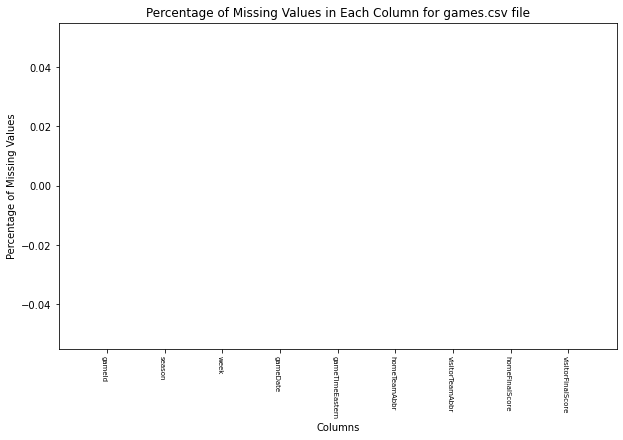

In [6]:
# Calculate the percentage of missing values for each column
missing_percentages = (games.isnull().mean() * 100).round(2)

# Plot the bar graph of missing data
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentages.index, missing_percentages.values, color='skyblue')

# Annotate bars with percentages for values greater than 0
annotations = []
for bar, percentage in zip(bars, missing_percentages):
    if percentage > 0:
        annotation = plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1,
                              f'{percentage}%', ha='center', va='bottom', fontsize=10)
        annotations.append(annotation)

# Adjust the rotation and font size of x-axis labels
plt.xticks(rotation=270, ha='right', fontsize=7)


plt.title('Percentage of Missing Values in Each Column for games.csv file')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

Based on the figure above, we can conclude that there is no missing data in the games.csv.

### gameId
- Just need to check if all our gameIds are unique

In [33]:
len(games["gameId"]) == len(set(games["gameId"]))

True

### Notes about missingness
- Nothing to note here as everything is present

## Players

The players data describes the attributes of a player. 
- nflID (unique identifier and PK of dataset): Player identification number (numeric)
- height: player height in format "feer-inches"(character)
- weight: player weight in lbs (numeric)
- birthdate: Date of birth in format "YYYY-MM-DD" (character)
- collegeName: college of player (character)
- position: position of player (character)
- displayName: name of the player (character)

In [18]:
players.info()
display(players.describe())
display(players.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1683 non-null   int64 
 1   height       1683 non-null   object
 2   weight       1683 non-null   int64 
 3   birthDate    1204 non-null   object
 4   collegeName  1683 non-null   object
 5   position     1683 non-null   object
 6   displayName  1683 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.2+ KB


,nflId,weight
count,1683.000000,1683.000000
mean,48221.702317,245.724302
std,5217.040133,47.119299
min,25511.000000,153.000000
25%,44828.500000,205.000000
50%,47872.000000,236.000000
75%,53471.500000,290.000000
max,55241.000000,380.000000


,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [19]:
#How many players are in our dataset
print(len(players))

1683


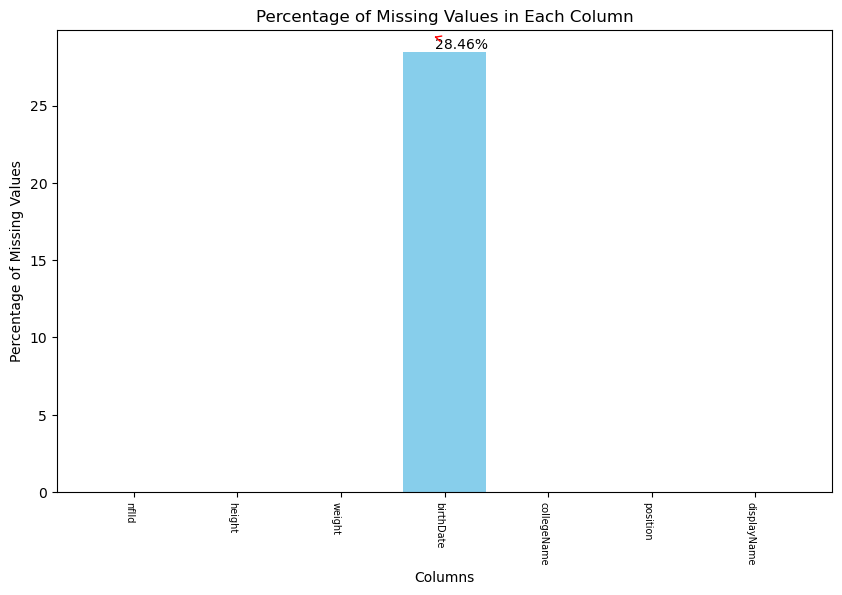

In [67]:
# Calculate the percentage of missing values for each column
missing_percentages = (players.isnull().mean() * 100).round(2)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentages.index, missing_percentages.values, color='skyblue')

# Annotate bars with percentages for values greater than 0
annotations = []
for bar, percentage in zip(bars, missing_percentages):
    if percentage > 0:
        annotation = plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1,
                              f'{percentage}%', ha='center', va='bottom', fontsize=10)
        annotations.append(annotation)

# Adjust the rotation and font size of x-axis labels
plt.xticks(rotation=270, ha='right', fontsize=7)

# Use adjust_text to automatically adjust text positions
adjust_text(annotations, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [5]:
players_missing = players[players.isna().any(axis=1)]
display(players_missing)

,nflId,height,weight,birthDate,collegeName,position,displayName
992,52272,6-0,170,NaN,Tusculum,CB,Dee Alford
1010,52430,6-3,192,NaN,Louisiana State,WR,Justin Jefferson
1036,52459,6-2,207,NaN,Alabama,CB,Trevon Diggs
1041,52464,6-7,310,NaN,Alabama,NT,Raekwon Davis
1101,52539,6-2,308,NaN,Louisiana State,NT,Rashard Lawrence
...,...,...,...,...,...,...,...
1678,55200,6-6,266,NaN,Indiana,DT,Ryder Anderson
1679,55212,6-0,230,NaN,Iowa State,ILB,Jake Hummel
1680,55239,6-2,300,NaN,Pennsylvania,DT,Prince Emili
1681,55240,6-1,185,NaN,Buffalo,CB,Ja'Marcus Ingram


### Notes about Missingness 
- We are not really concerned with any data that is missing from the players table as birthDate is not that important in the context of the this problem

# Plays
This data describes a specific play for a game in depth from a game overview standpoint
- gameId (PK with playId and FK from games data): game identifier (numeric)
- playID (PK with gameID and NOT unique across games): play identifier (numeric)
- ballCarrierId (FK from players data): nflId of ball carrier, i.e. the player that the defense is attempting to tackle (numeric)
- ballCarrierName; displayName for players data of the ball carrier (character)
- playDescription: description of the play in text (character)
- quarter: game quarter (numeric)
- down: down of the play (numeric)
- yardsToGo: distance to get first down (numeric)
- possessionTeam: Team abbr of team on offense with possession of ball (character)
- defensiveTeam: Team abbr of team on defense (character)
- yardlineSide: 3-letter team code corresoponding to the line of scrimmage (own side or opponents side) (character)
- gameClock: Time of clock when play begins(MM:SS) (character)
- preSnapHomeScore: Home score prior to the play (numeric)
- preSnapVisitorScore: Visitor score prior to the play (numeric)
- passResult: dropback outcome of the play; more details below (character)
- passLength: distance beyond the line of scrimmage the ball travled not inlcuding yards into endzone (basically the passing yards stat) (numeric)
- penaltyYards: yards gained by offense by penatly (could be negative) (numeric)
- prePenaltyPlayResult: net yards gained by the offense, before penalty yardage (numeric)
- playResult: net yards gained by the offense, inlcuding penalty yardage (numeric)
- playNullifiedByPenalty: Whether or not an accepted penalty on play concels the play (character)
- absoluteYardlineNumber: Distnace from enzone for possession team (numeric)
- offenseFormation: Formation used by possession team (more on varibale down below) (character)
- defendersInTheBox: Number of defenders in close proiximity to line-of-scrimmage (numeric)
- passProbability: NGS probability of nex play being pass based on model, not the actually probability of pass being caught (numeric)
- preSnapHomeTeamWinProbability: win probability of the home team before the play (numeric)
- preSnapVisitorTeamWinProbability: win probability of the visitor team before the play (numeric)
- homeTeamWinProbabilityAdded: Win probability change for the home team (numeric)
- visitorTeamWinProbabilityAdded: Win probability for visitor team (numeric)
- expectedPoints: expected points on this play (numeric)
- expectedPointsAdded: change of expected points on this play (numeric)
- foulName[I]: name of penalty commited (character)
- foulNflId[I]: nflId of player who commited the the penalty (numeric)

In [22]:
plays.info()
display(plays.describe())
display(plays.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            12486 non-null  int64  
 1   playId                            12486 non-null  int64  
 2   ballCarrierId                     12486 non-null  int64  
 3   ballCarrierDisplayName            12486 non-null  object 
 4   playDescription                   12486 non-null  object 
 5   quarter                           12486 non-null  int64  
 6   down                              12486 non-null  int64  
 7   yardsToGo                         12486 non-null  int64  
 8   possessionTeam                    12486 non-null  object 
 9   defensiveTeam                     12486 non-null  object 
 10  yardlineSide                      12319 non-null  object 
 11  yardlineNumber                    12486 non-null  int64  
 12  game

,gameId,playId,ballCarrierId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,passLength,penaltyYards,prePenaltyPlayResult,playResult,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulNFLId1,foulNFLId2
count,1.248600e+04,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,5634.000000,615.000000,12486.000000,12486.000000,12486.000000,12481.000000,12149.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12485.000000,592.000000,25.00000
mean,2.022099e+09,1986.603476,48072.271664,2.550136,1.727054,8.469085,29.573122,11.170671,9.862967,5.455982,-2.091057,7.582012,7.218565,60.426077,6.424085,0.603845,0.556236,0.443764,0.000110,-0.000110,2.258360,0.297367,47759.856419,50000.56000
std,5.953106e+03,1174.657363,4648.681597,1.136714,0.793536,3.927737,12.446971,9.442045,9.142307,8.258211,8.847321,8.751092,9.190933,23.917280,1.014728,0.237096,0.287751,0.287751,0.036748,0.036748,1.619769,1.194641,5010.592593,3494.05977
min,2.022091e+09,54.000000,25511.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-9.000000,-15.000000,-26.000000,-61.000000,11.000000,1.000000,0.005607,0.001049,0.000825,-0.521181,-0.471527,-2.366872,-9.986150,33107.000000,43586.00000
25%,2.022093e+09,954.000000,44860.000000,2.000000,1.000000,6.000000,21.000000,3.000000,0.000000,0.000000,-10.000000,2.000000,2.000000,40.000000,6.000000,0.447226,0.331557,0.207915,-0.011382,-0.011799,1.055965,-0.437525,43572.750000,47790.00000
50%,2.022101e+09,1990.500000,47789.000000,3.000000,2.000000,10.000000,30.000000,10.000000,7.000000,4.000000,-5.000000,5.000000,5.000000,61.000000,6.000000,0.584451,0.585621,0.414379,0.000008,-0.000008,2.031321,0.112532,47793.500000,48089.00000
75%,2.022102e+09,2989.000000,52733.000000,4.000000,2.000000,10.000000,40.000000,17.000000,16.000000,9.000000,5.000000,10.000000,10.000000,80.000000,7.000000,0.792913,0.792085,0.668443,0.011799,0.011382,3.451942,0.899947,53063.000000,52553.00000
max,2.022111e+09,5096.000000,55158.000000,5.000000,4.000000,38.000000,50.000000,49.000000,48.000000,61.000000,15.000000,98.000000,98.000000,109.000000,11.000000,0.996206,0.999175,0.998951,0.471527,0.521181,6.558894,8.698986,55157.000000,54650.00000


,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [31]:
#Find number of plays in the data
print(len(plays))

12486


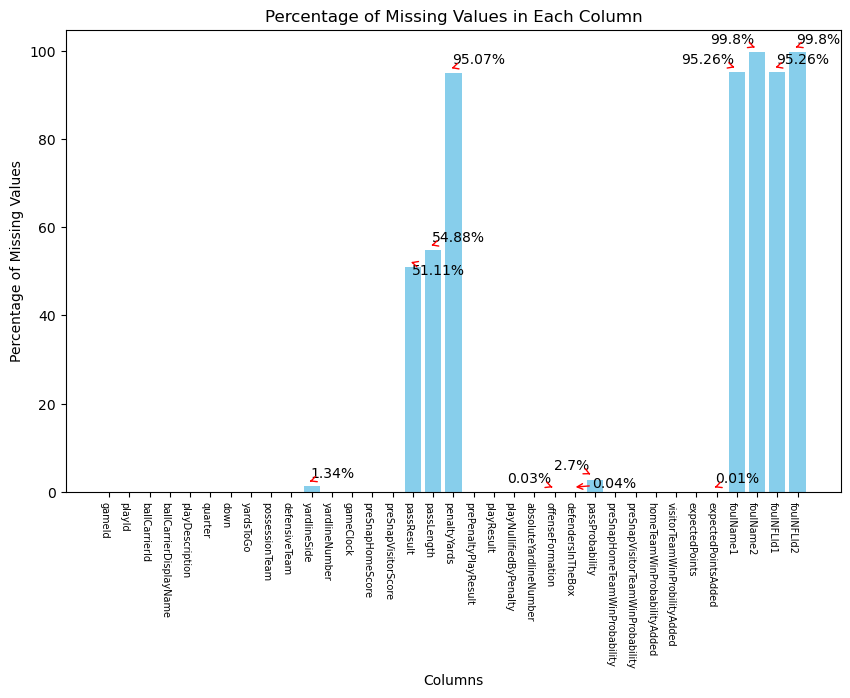

In [66]:
# Calculate the percentage of missing values for each column
missing_percentages = (plays.isnull().mean() * 100).round(2)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentages.index, missing_percentages.values, color='skyblue')

# Annotate bars with percentages for values greater than 0
annotations = []
for bar, percentage in zip(bars, missing_percentages):
    if percentage > 0:
        annotation = plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1,
                              f'{percentage}%', ha='center', va='bottom', fontsize=10)
        annotations.append(annotation)

# Adjust the rotation and font size of x-axis labels
plt.xticks(rotation=270, ha='right', fontsize=7)

# Use adjust_text to automatically adjust text positions
adjust_text(annotations, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

- 1.34% of yardlineSide are missing (plays at 50, nothing to worry about)
- 51.11% of passResult are missing which represents a play that was not either a complted pass of scrammble
- 54.88% of passLength are missing which represents a play that 
- 95.07% of penaltyYars are missing which represents plays that not have a penatly added/deducted from offensive drive
- 0.03 % of offenseFormation are missing
- 0.04% of defendersInTheBox are missing
- 2.7% of passProbability are missing
- 0.01% of expectextedPointsAdded are missing
- lots of foulnames adjusted missing which represents the players who were penatlized

### quarter variable

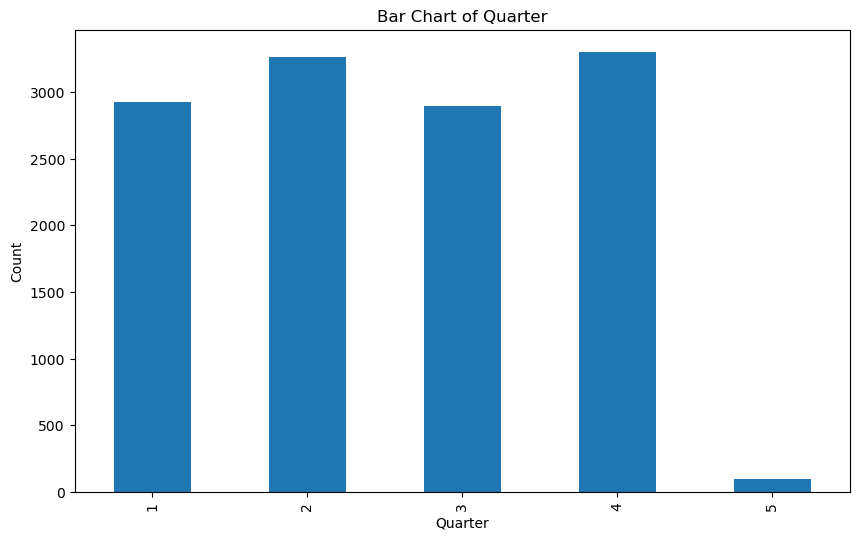

In [10]:
# Create a bar chart - quarter variable
plt.figure(figsize=(10, 6))

# Set the order of quarters
quarter_order = [1, 2, 3, 4,5]

plays["quarter"].value_counts(dropna = False).loc[quarter_order].plot(kind='bar',) #include NA values
plt.title(f'Bar Chart of Quarter')
plt.xlabel("Quarter")
plt.ylabel('Count')
plt.show()

### Notes about quarter variable
- Distribution looks fine 
- OT is labeled as quarter 5

### down variable

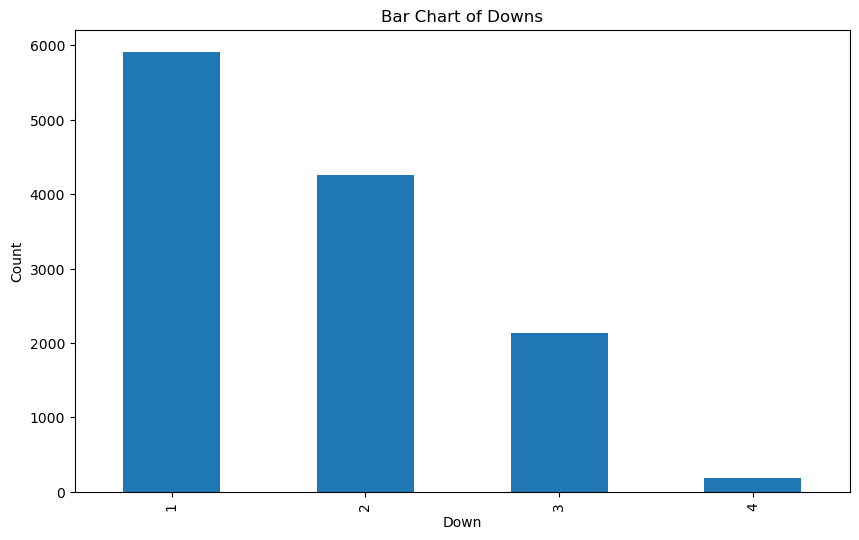

In [14]:
# Create a bar chart - quarter variable
plt.figure(figsize=(10, 6))

# Set the order of quarters .loc[quarter_order]
#quarter_order = [1, 2, 3, 4]

plays["down"].value_counts(dropna = False).plot(kind='bar',) #include NA values
plt.title(f'Bar Chart of Downs')
plt.xlabel("Down")
plt.ylabel('Count')
plt.show()

### Notes about quarter 
- Nothing looks wrong with distribution of downs. It makes sense that it looks like this

### yardsToGo

In [20]:
plays["yardsToGo"].describe()

count    12486.000000
mean         8.469085
std          3.927737
min          1.000000
25%          6.000000
50%         10.000000
75%         10.000000
max         38.000000
Name: yardsToGo, dtype: float64

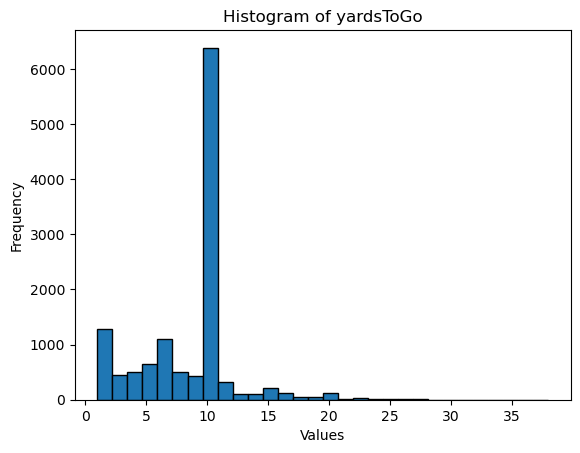

In [19]:
# Create a histogram
plt.hist(plays["yardsToGo"], bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of yardsToGo')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Notes about yardsToGo
- Everything looks normal 
- it looks like anything on "inches" was just labeled as 1

### possessionTeam


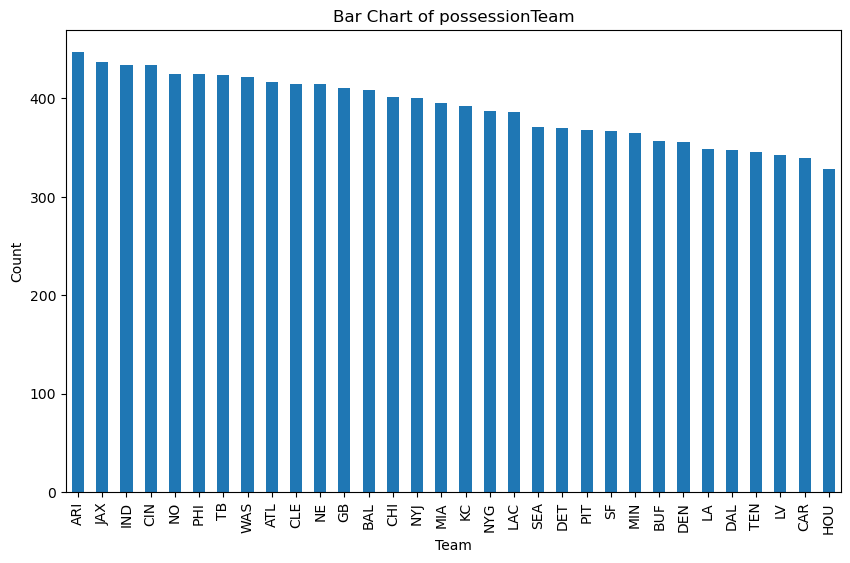

In [23]:
# Create a bar chart - quarter variable
plt.figure(figsize=(10, 6))


plays["possessionTeam"].value_counts(dropna = False).plot(kind='bar') #include NA values
plt.title(f'Bar Chart of possessionTeam')
plt.xlabel("Team")
plt.ylabel('Count')
plt.show()

### Notes about possessionTeam
- Nothing abnormal 
- All teams are close together around number of plays they ran
- ARI being the most plays ran, HOU being the least plays ran

### defensiveTeam

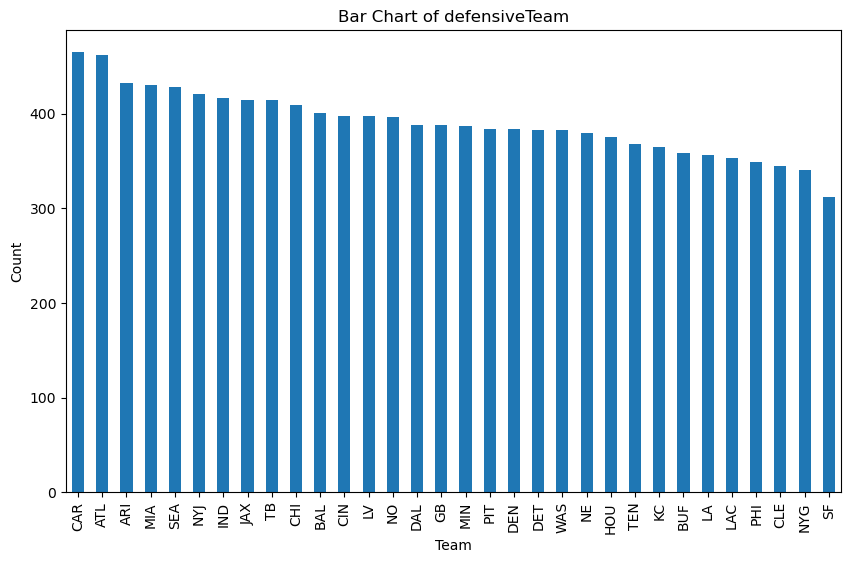

In [24]:
# Create a bar chart - quarter variable
plt.figure(figsize=(10, 6))

plays["defensiveTeam"].value_counts(dropna = False).plot(kind='bar') #include NA values
plt.title(f'Bar Chart of defensiveTeam')
plt.xlabel("Team")
plt.ylabel('Count')
plt.show()

### Notes about defensiveTeam
- Nothing abnormal here again, looks like all teams had fair distribution of plays on defense

### yardlineSide

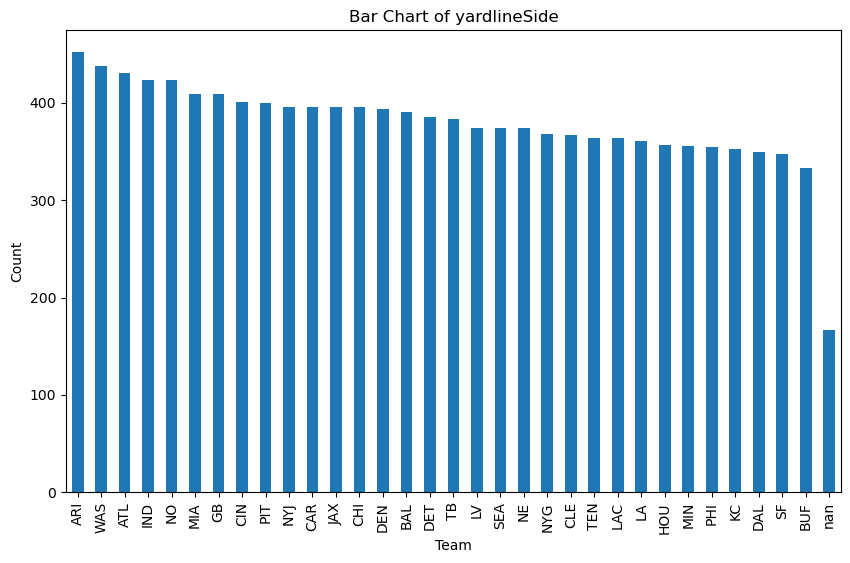

In [26]:
# Create a bar chart - quarter variable
plt.figure(figsize=(10, 6))

plays["yardlineSide"].value_counts(dropna = False).plot(kind='bar') #include NA values
plt.title(f'Bar Chart of yardlineSide')
plt.xlabel("Team")
plt.ylabel('Count')
plt.show()

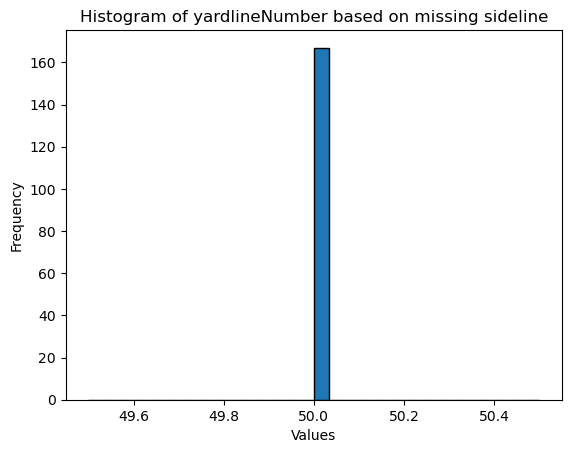

In [29]:
yardlineSide_missing = plays[plays['yardlineSide'].isnull()]
# Create a histogram of yards based on yardlineSide_missing
plt.hist(yardlineSide_missing["yardlineNumber"], bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of yardlineNumber based on missing sideline')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Notes about yarlineSideline
- everything looks normal except there are some missing
- this graph illustrates that they are missing because the yardline number is at 50 where it is in no mans land

### yardlineNumber

In [30]:
plays["yardlineNumber"].describe()

count    12486.000000
mean        29.573122
std         12.446971
min          1.000000
25%         21.000000
50%         30.000000
75%         40.000000
max         50.000000
Name: yardlineNumber, dtype: float64

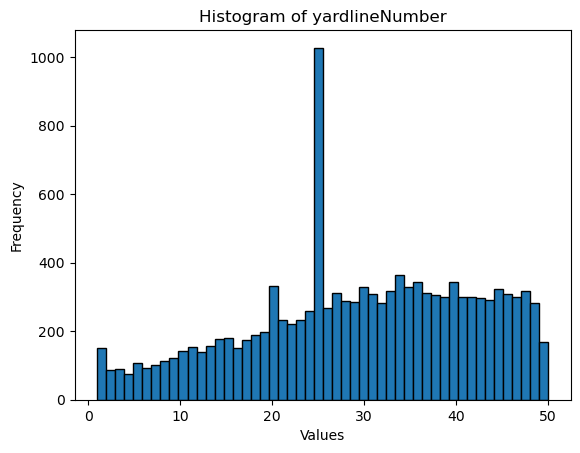

In [32]:
# Create a histogram
plt.hist(plays["yardlineNumber"], bins=50, edgecolor='black')

# Add labels and title
plt.title('Histogram of yardlineNumber')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Notes about yardlineNumber
- Nothing abnormal with the ditribution
- one instance with large distribution is 25 because thats where most drives start
- goes from 0 to 50 and depends on the yardlineSide variable to determine which yardline they are in

### gameClock
- For this variable, we need to transform the game clock variable into seconds

In [40]:
#function to change time format to second which will be useful for features in our model
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    total_seconds = minutes * 60 + seconds
    return total_seconds


plays["gameClockSeconds"] = plays["gameClock"].apply(time_to_seconds)

In [41]:
plays["gameClockSeconds"].describe()

count    12486.000000
mean       442.795771
std        267.473999
min          1.000000
25%        203.000000
50%        434.000000
75%        676.000000
max        900.000000
Name: gameClockSeconds, dtype: float64

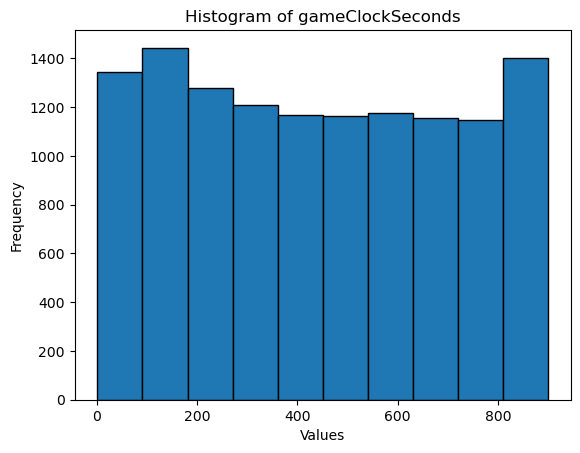

In [42]:
# Create a histogram
plt.hist(plays["gameClockSeconds"], edgecolor='black')

# Add labels and title
plt.title('Histogram of gameClockSeconds')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Notes about gameClock 
- all values are within 0-900 seconds (i.e. 0 to 15 minutes for each quarter)

### preSnapHomeScore

In [43]:
plays["preSnapHomeScore"].describe()

count    12486.000000
mean        11.170671
std          9.442045
min          0.000000
25%          3.000000
50%         10.000000
75%         17.000000
max         49.000000
Name: preSnapHomeScore, dtype: float64

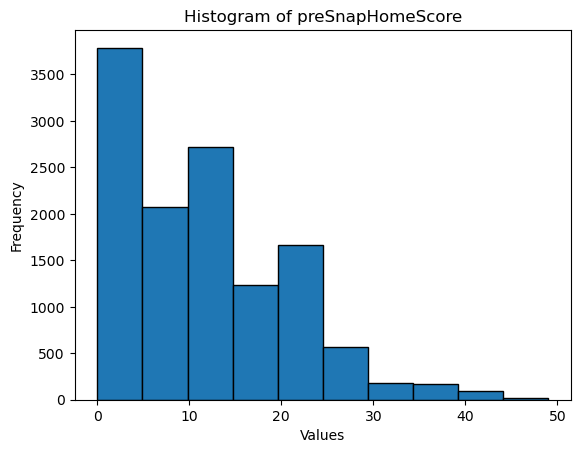

In [44]:
# Create a histogram
plt.hist(plays["preSnapHomeScore"], edgecolor='black')

# Add labels and title
plt.title('Histogram of preSnapHomeScore')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Notes for preSnapHomeScore
- Everything looks normal

### preSnapVisitorScore

In [45]:
plays["preSnapVisitorScore"].describe()

count    12486.000000
mean         9.862967
std          9.142307
min          0.000000
25%          0.000000
50%          7.000000
75%         16.000000
max         48.000000
Name: preSnapVisitorScore, dtype: float64

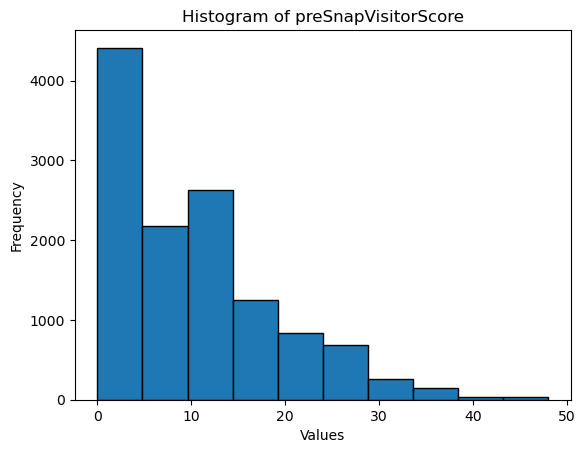

In [46]:
# Create a histogram
plt.hist(plays["preSnapVisitorScore"], edgecolor='black')

# Add labels and title
plt.title('Histogram of preSnapVisitorScore')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Notes about preSnapVisitorScore
- everything looks normal

### passResult variable

This variable is a categorical variable to determine the dropback outcome of the play 
- C: Completed Pass
- I: Incomplete Pass
- S: Quarterback Sack
- IN: Intercepted Pass
- R: Scramble

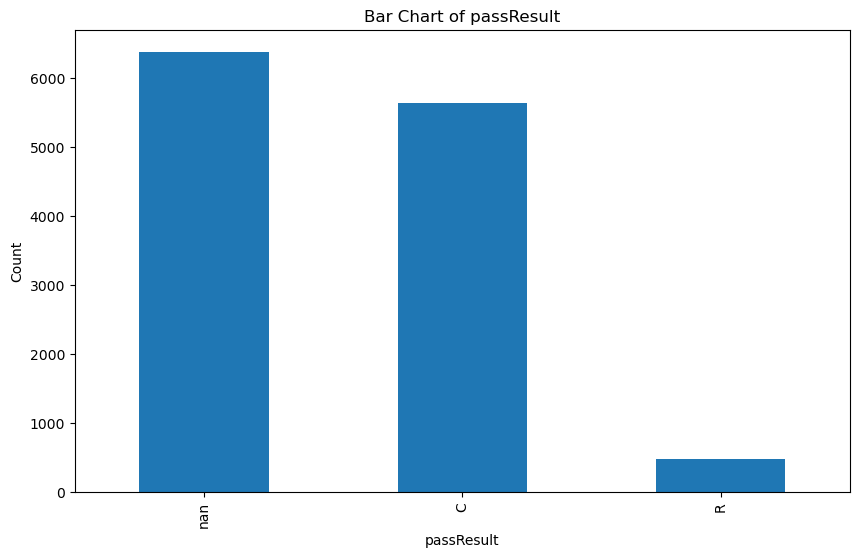

In [30]:
# Create a bar chart - passResult
plt.figure(figsize=(10, 6))
plays["passResult"].value_counts(dropna = False).plot(kind='bar') #include NA values
plt.title(f'Bar Chart of passResult')
plt.xlabel("passResult")
plt.ylabel('Count')
plt.show()

### offenseFormation
- Shotgun 
- Singleback
- I_form
- Empty
- Pistol
- Jumbo 
- NAN (Not sure why this would)

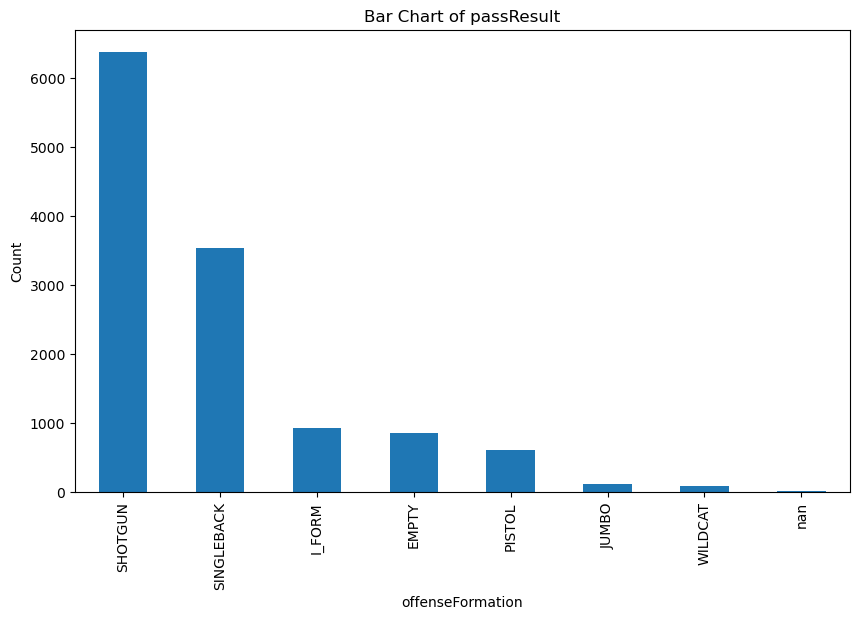

In [72]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
plays["offenseFormation"].value_counts(dropna = False).plot(kind='bar') #include NA values
plt.title(f'Bar Chart of offenseFormation')
plt.xlabel("offenseFormation")
plt.ylabel('Count')
plt.show()

### Notes about Missingness


## Tackles
- gameId (PK with playId and nflId and FK from games data): game identifier (numeric)
- playId (PK with gameId and nflId and FK from plays data): play identifier (numeric)
- nflId (PK with gameId and playId and FK from players data) : player identifier (numeric)
- tackle: indicator for whether the given player made a tackle of the play (numeric, 1 or 0)
- assist: indicator for whether the given player made a tackle of the play (numeric, 1 or 0)
- forcedFumble: indicator for whether the given player forced a fumble of a play (numeric, 1 or 0)
- pff_missedTackle: provided by pro football focus. Indicator for whether the given player missed a tackle on the play (numeric, 1 or 0)

In [73]:
tackles.info()
display(tackles.describe())
display(tackles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17426 entries, 0 to 17425
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gameId            17426 non-null  int64
 1   playId            17426 non-null  int64
 2   nflId             17426 non-null  int64
 3   tackle            17426 non-null  int64
 4   assist            17426 non-null  int64
 5   forcedFumble      17426 non-null  int64
 6   pff_missedTackle  17426 non-null  int64
dtypes: int64(7)
memory usage: 953.1 KB


,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
count,1.742600e+04,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000
mean,2.022099e+09,1982.974578,47602.719442,0.569207,0.315276,0.005681,0.119936
std,5.978775e+03,1170.990596,4846.585868,0.495201,0.464639,0.075161,0.324896
min,2.022091e+09,54.000000,33131.000000,0.000000,0.000000,0.000000,0.000000
25%,2.022093e+09,952.000000,43797.000000,0.000000,0.000000,0.000000,0.000000
50%,2.022101e+09,1991.000000,46669.000000,1.000000,0.000000,0.000000,0.000000
75%,2.022102e+09,2981.750000,52546.000000,1.000000,1.000000,0.000000,0.000000
max,2.022111e+09,5096.000000,55241.000000,1.000000,1.000000,1.000000,1.000000


,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [77]:
#Find number of tackles in the data
print(len(tackles)) #more tackles than plays for multiple players who obtained tackle on same play

17426


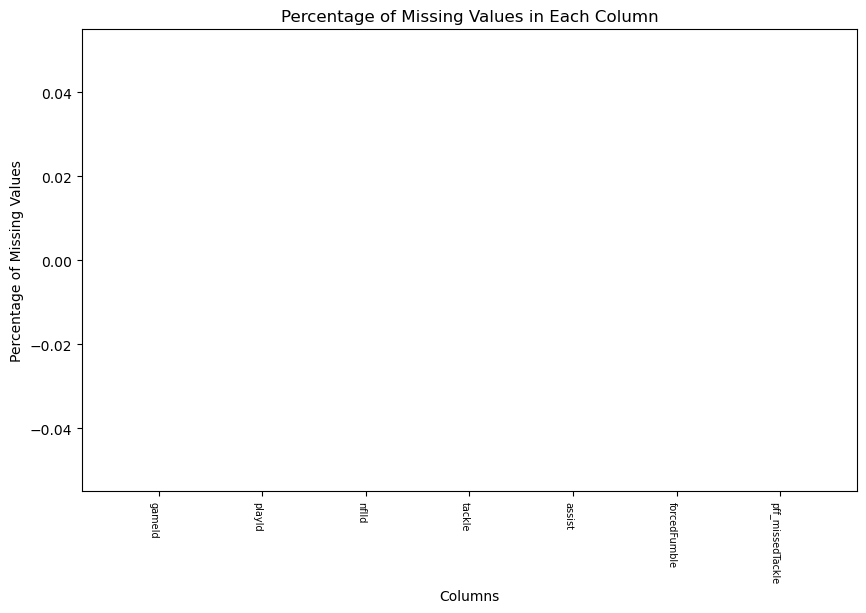

In [76]:
# Calculate the percentage of missing values for each column
missing_percentages = (tackles.isnull().mean() * 100).round(2)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentages.index, missing_percentages.values, color='skyblue')

# Annotate bars with percentages for values greater than 0
annotations = []
for bar, percentage in zip(bars, missing_percentages):
    if percentage > 0:
        annotation = plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1,
                              f'{percentage}%', ha='center', va='bottom', fontsize=10)
        annotations.append(annotation)

# Adjust the rotation and font size of x-axis labels
plt.xticks(rotation=270, ha='right', fontsize=7)


plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

### tackling variable

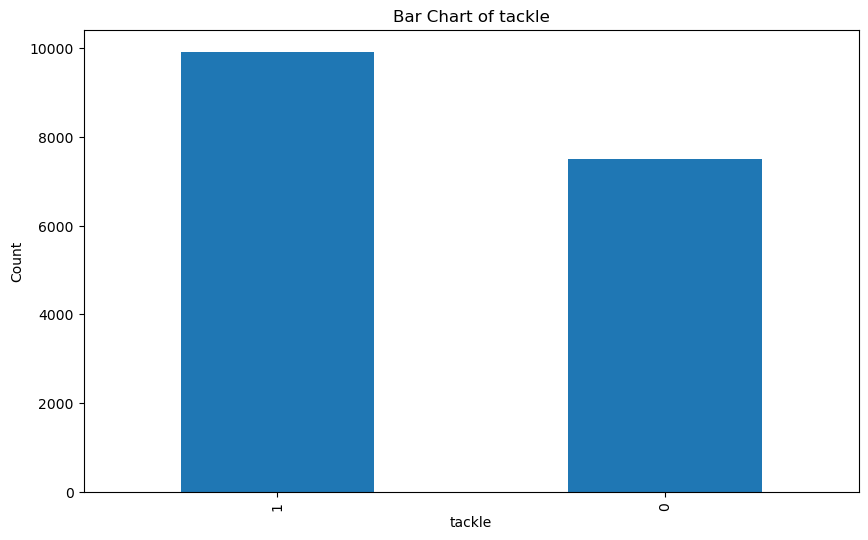

In [47]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
tackles["tackle"].value_counts(dropna = False).plot(kind='bar') #include NA values
plt.title(f'Bar Chart of tackle')
plt.xlabel("tackle")
plt.ylabel('Count')
plt.show()

### Notes about tackle 
- All tackles either have a value of zero or 1, it must be the case that all 0 tackles are tackles that were missed or an assist

### assist variable

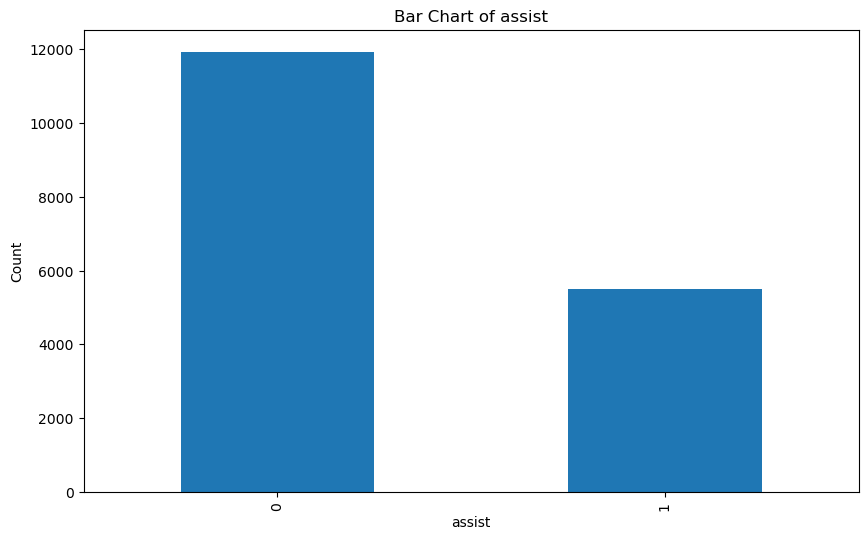

In [49]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
tackles["assist"].value_counts(dropna = False).plot(kind='bar') #include NA values
plt.title(f'Bar Chart of assist')
plt.xlabel("assist")
plt.ylabel('Count')
plt.show()

### Notes about the assist variable
- not every tackle has an assist and a missed tackle does not count as assist

### forcedFumble variable 

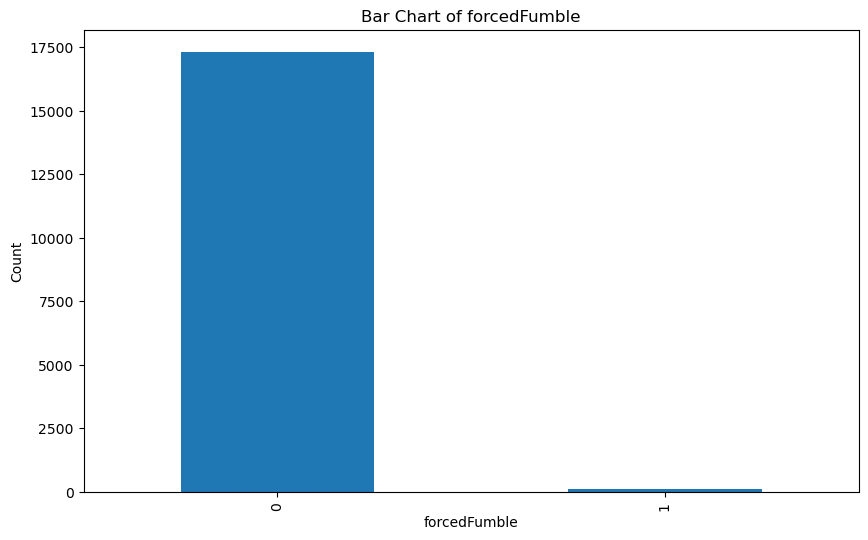

In [50]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
tackles["forcedFumble"].value_counts(dropna = False).plot(kind='bar') #include NA values
plt.title(f'Bar Chart of forcedFumble')
plt.xlabel("forcedFumble")
plt.ylabel('Count')
plt.show()

### Notes about forcedFumble 
- Very reasonable plot since most tackles do not have a forcedFumble

### pff_missedTackle variable

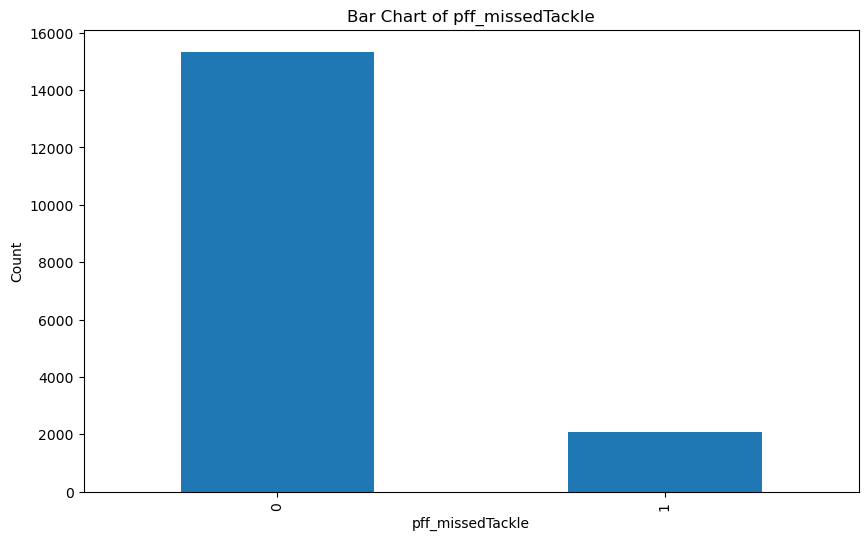

In [52]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
tackles["pff_missedTackle"].value_counts(dropna = False).plot(kind='bar') #include NA values
plt.title(f'Bar Chart of pff_missedTackle')
plt.xlabel("pff_missedTackle")
plt.ylabel('Count')
plt.show()

## Tracking
- gameId (PK with playId and nflId and FK from games data): game identifier (numeric)
- playId (PK with gameId and nflId and FK from plays data): play identifier (numeric)
- nflId (PK with gameId and playId and FK from players data) : player identifier (numeric)
- displayName: player name from players data (character)
- frameId: frame identifier for each play, starting at 1 (every tenth of second) (numeric)
- time: time stamp of play in the format of yyyy-mm-dd, hh:mm:ss.mmmmmmmm (character)
- jerseyNumber: jersey number of player (numeric)
- club: team abbrevation of the player (character)
- playDirection: direction that the offese is moving (left or right) (characer)
- x: player position along the long axis of the field (0-120 yards) (numeric)
- y: player position along the wide axis of the field (0 - 53.3 yards) (numeric)
- s: speed in yards/sec (numeric)
- a: speed in yards/sec^2 (numeric)
- dis: distance traveled from point proir time point, in yards (numeric)
- o: player orientation (deg), 0-360 (numeric)
- dir: angle of player motion (deg), 0 - 360 degrees (numeric)
- event: tagged play details (character)

In [28]:
tracking.info()
display(tracking[tracking["displayName"]!="football"].describe()[1:])
display(tracking.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12187398 entries, 0 to 12187397
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   gameId         int64  
 1   playId         int64  
 2   nflId          float64
 3   displayName    object 
 4   frameId        int64  
 5   time           object 
 6   jerseyNumber   float64
 7   club           object 
 8   playDirection  object 
 9   x              float64
 10  y              float64
 11  s              float64
 12  a              float64
 13  dis            float64
 14  o              float64
 15  dir            float64
 16  event          object 
dtypes: float64(9), int64(3), object(5)
memory usage: 1.5+ GB


,gameId,playId,nflId,frameId,jerseyNumber,x,y,s,a,dis,o,dir
mean,2.022099e+09,1981.036699,47459.700224,25.511692,48.947584,60.411867,26.866387,2.664730,1.745839,0.269951,179.346646,179.579415
std,5.933396e+03,1170.470709,5156.729369,17.652625,30.881217,24.601236,9.315814,1.956908,1.236658,0.197107,102.318965,105.518607
min,2.022091e+09,54.000000,25511.000000,1.000000,1.000000,-3.550000,-6.410000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.022093e+09,949.000000,43426.000000,11.000000,21.000000,41.030000,21.460000,1.110000,0.800000,0.110000,88.550000,88.930000
50%,2.022101e+09,1997.000000,46521.000000,23.000000,52.000000,60.820000,26.880000,2.310000,1.530000,0.230000,179.000000,179.280000
75%,2.022102e+09,2979.000000,52594.000000,37.000000,76.000000,79.800000,32.250000,3.950000,2.460000,0.400000,269.260000,270.200000
max,2.022111e+09,5096.000000,55241.000000,164.000000,99.000000,122.960000,59.720000,18.080000,55.940000,4.980000,360.000000,360.000000


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN


## s

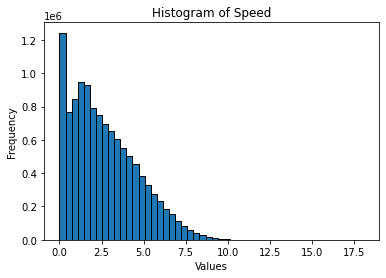

In [27]:
# Create a histogram
plt.hist(tracking[tracking["displayName"]!="football"]["s"], edgecolor='black', bins = 50)

# Add labels and title
plt.title('Histogram of Speed')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [29]:
display(tracking[tracking["displayName"]!="football"]["s"].describe()[1:])

mean     2.664730
std      1.956908
min      0.000000
25%      1.110000
50%      2.310000
75%      3.950000
max     18.080000
Name: s, dtype: float64

No issues with the speed variable. It is reasonable for a player to reach a speed of 18 yards/sec ~ 39 mph which is not possible. Lets take a look at those.

In [8]:
tackles[(tackles["gameId"]==2022091809) & tackles["playId"]==1977]

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle


In [7]:
display(tracking[(tracking["s"]>12)&(tracking["club"]!="football")])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1281703,2022091113,1689,44904.0,Jourdan Lewis,8,2022-09-11 21:32:39.099999,2.0,DAL,left,96.64,37.70,13.09,13.81,1.06,70.38,348.90,NaN
1281704,2022091113,1689,44904.0,Jourdan Lewis,9,2022-09-11 21:32:39.200000,2.0,DAL,left,96.41,38.90,12.87,6.46,1.22,72.59,349.08,NaN
1281705,2022091113,1689,44904.0,Jourdan Lewis,10,2022-09-11 21:32:39.299999,2.0,DAL,left,96.17,40.16,12.51,11.21,1.28,72.59,349.16,NaN
1306011,2022091113,2954,44904.0,Jourdan Lewis,16,2022-09-11 22:40:33.900000,2.0,DAL,left,61.00,49.28,12.80,6.83,1.60,86.91,352.99,out_of_bounds
1306012,2022091113,2954,44904.0,Jourdan Lewis,17,2022-09-11 22:40:34.000000,2.0,DAL,left,60.83,50.61,12.31,7.28,1.34,86.18,352.83,NaN
2286893,2022091809,1956,43478.0,Anthony Brown,26,2022-09-18 18:01:30.900000,3.0,DAL,left,65.67,10.47,17.91,55.94,1.61,33.22,213.84,NaN
2286895,2022091809,1956,43478.0,Anthony Brown,28,2022-09-18 18:01:31.099999,3.0,DAL,left,64.57,9.07,12.48,9.61,1.30,32.74,216.61,NaN
2286908,2022091809,1956,43478.0,Anthony Brown,41,2022-09-18 18:01:32.400000,3.0,DAL,left,61.00,5.37,12.25,32.40,1.04,29.89,211.78,NaN
2288102,2022091809,1977,43478.0,Anthony Brown,43,2022-09-18 18:02:08.200000,3.0,DAL,left,59.87,7.93,13.76,19.01,1.39,22.97,203.91,NaN
2288103,2022091809,1977,43478.0,Anthony Brown,44,2022-09-18 18:02:08.299999,3.0,DAL,left,59.13,6.27,18.08,23.80,1.82,22.97,203.70,NaN


It turns out that most of the tracking has the football speed as the outlier. However, there are a couple players that have absurd speeds, so we will need to cap these out.

## a

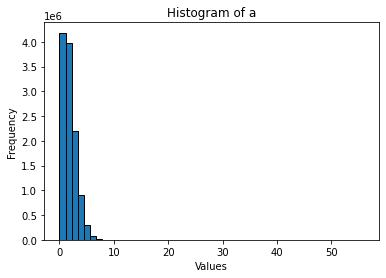

In [26]:
# Create a histogram
plt.hist(tracking[tracking["displayName"]!="football"]["a"], edgecolor='black', bins = 50)

# Add labels and title
plt.title('Histogram of Acceleration')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [30]:
display(tracking[tracking["displayName"]!="football"]["a"].describe()[1:])

mean     1.745839
std      1.236658
min      0.000000
25%      0.800000
50%      1.530000
75%      2.460000
max     55.940000
Name: a, dtype: float64

In [21]:
display(tracking[(tracking["displayName"]!="football") & (tracking["a"]>15)])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1281698,2022091113,1689,44904.0,Jourdan Lewis,3,2022-09-11 21:32:38.599999,2.0,DAL,left,97.40,34.00,2.86,15.23,0.60,67.36,346.70,NaN
1281699,2022091113,1689,44904.0,Jourdan Lewis,4,2022-09-11 21:32:38.700000,2.0,DAL,left,97.33,34.28,4.79,17.06,0.29,66.44,347.34,NaN
1281700,2022091113,1689,44904.0,Jourdan Lewis,5,2022-09-11 21:32:38.799999,2.0,DAL,left,97.19,34.95,6.92,15.93,0.68,67.53,347.96,NaN
1281706,2022091113,1689,44904.0,Jourdan Lewis,11,2022-09-11 21:32:39.400000,2.0,DAL,left,95.97,41.21,10.75,17.60,1.07,72.59,349.28,NaN
1281707,2022091113,1689,44904.0,Jourdan Lewis,12,2022-09-11 21:32:39.500000,2.0,DAL,left,95.79,42.18,8.91,18.61,0.98,72.59,349.31,first_contact
1281708,2022091113,1689,44904.0,Jourdan Lewis,13,2022-09-11 21:32:39.599999,2.0,DAL,left,95.66,42.95,7.09,16.98,0.78,73.46,349.46,NaN
1309416,2022091113,3139,44904.0,Jourdan Lewis,13,2022-09-11 22:49:49.500000,2.0,DAL,left,76.33,47.32,6.84,15.31,1.29,86.25,357.35,NaN
2286887,2022091809,1956,43478.0,Anthony Brown,20,2022-09-18 18:01:30.299999,3.0,DAL,left,66.30,11.27,5.17,16.20,0.20,33.22,33.20,NaN
2286888,2022091809,1956,43478.0,Anthony Brown,21,2022-09-18 18:01:30.400000,3.0,DAL,left,66.53,11.63,6.85,19.14,0.43,33.22,32.88,NaN
2286892,2022091809,1956,43478.0,Anthony Brown,25,2022-09-18 18:01:30.799999,3.0,DAL,left,66.57,11.80,10.75,44.59,1.35,33.22,214.49,NaN


In [4]:
plays_to_rem = tracking[(tracking["displayName"]!="football") & (tracking["a"]>17)][["gameId","playId"]].drop_duplicates()
display(plays_to_rem)

,gameId,playId
1281699,2022091113,1689
2286888,2022091809,1956
2288075,2022091809,1977


Given Usain Bolt can run at an acceleration of 10.9 yd/s^2. I think it is safe to say that any thing above 10 yd/s^ can be

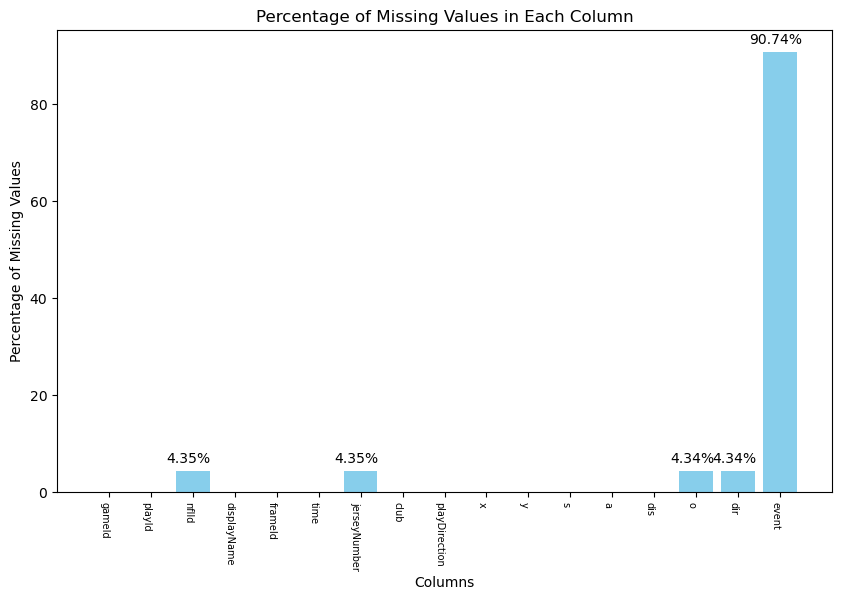

In [81]:
# Calculate the percentage of missing values for each column
missing_percentages = (tracking.isnull().mean() * 100).round(2)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentages.index, missing_percentages.values, color='skyblue')

# Annotate bars with percentages for values greater than 0
annotations = []
for bar, percentage in zip(bars, missing_percentages):
    if percentage > 0:
        annotation = plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1,
                              f'{percentage}%', ha='center', va='bottom', fontsize=10)
        annotations.append(annotation)

# Adjust the rotation and font size of x-axis labels
plt.xticks(rotation=270, ha='right', fontsize=7)


plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

### event
- NAN
- first_contact
- tackle
- ball_snap
- pass_outcome_caught
- handoff
- pass_arrived
- out_bounds
- run
- man_in_motion
- play_action
- touchdown
- fumble
- shift 
- qb_slide
- pass_foward
- snap_direct
- line_set
- lateral
- autoevent_ballsnap
- run_pass_option
- qb_sack
- pass_shovel
- fumble_defense_recovered
- fumble_offense_recovered
- autoevent_passinterrupted
- autoevent_passfoward

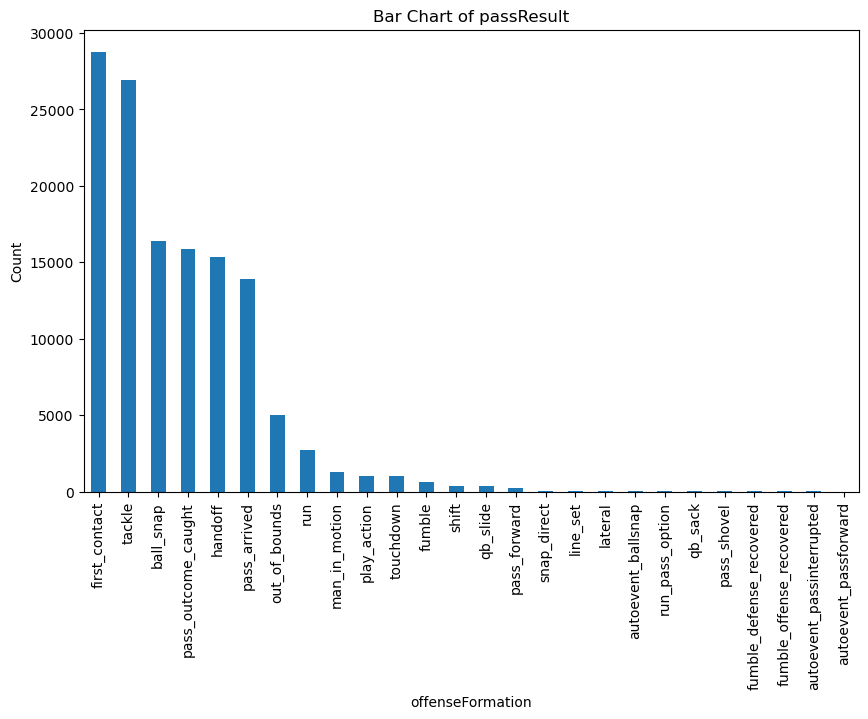

In [83]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
tracking["event"].value_counts().plot(kind='bar') #include NA values
plt.title(f'Bar Chart of event')
plt.xlabel("event")
plt.ylabel('Count')
plt.show()